In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [2]:
URL = "https://app2.hkp.com.hk/utx/default.jsp?lang=en"   # transaction history reocrd within 3 years
src = requests.get(URL).content
soup = BeautifulSoup(src, 'lxml')

In [3]:
l = []

for w in soup.find_all('span', 'normalFont'):
    text = w.get_text()
    text = text.replace('\t', '')
    text = text.replace('\r', '')
    text = text.replace('\n', '')
    text = text.replace('\xa0', '')
    l.append(text)
    
    name = pd.Series(l)
    estate = name.str.extract("(\w*\.*\'*\-*\w*\.*\s*\w+\s*\w+\s*\w+)")   # for extracting names with special characters like ', -, .
    num = name.str.extract('(\d+)Transactions')
    
    table = pd.concat([estate, num], axis=1)
    table.columns = ['Estate_Name', 'Transactions']
    
table.head(20)

,Estate_Name,Transactions
0,Taikoo Shing,870
1,South Horizons,600
2,Kornhill,419
3,Heng Fa Chuen,413
4,Chi Fu Fa Yuen,303
5,Residence Bel,246
6,Island Resort,244
7,Grand Promenade,209
8,Nan Fung Sun Chuen,188
9,Lei King Wan,185


In [4]:
# slicing for dropping unnecessary data
table = table[13:]
table.head()

,Estate_Name,Transactions
13,Hong Kong Central,NaN
14,The Avenue,164
15,The Zenith,84
16,J Residence,69
17,The Legend At Jardine,53


In [5]:
# original # of rows & cols
print(table.shape)

table = table.drop_duplicates()
print(table.shape)

(472, 2)
(438, 2)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
all_table = table.dropna()
all_table.head()

,Estate_Name,Transactions
14,The Avenue,164
15,The Zenith,84
16,J Residence,69
17,The Legend At Jardine,53
18,Illumination Terrace,53


In [8]:
# change data type for plotting
all_table['Transactions'] = all_table['Transactions'].astype(int)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


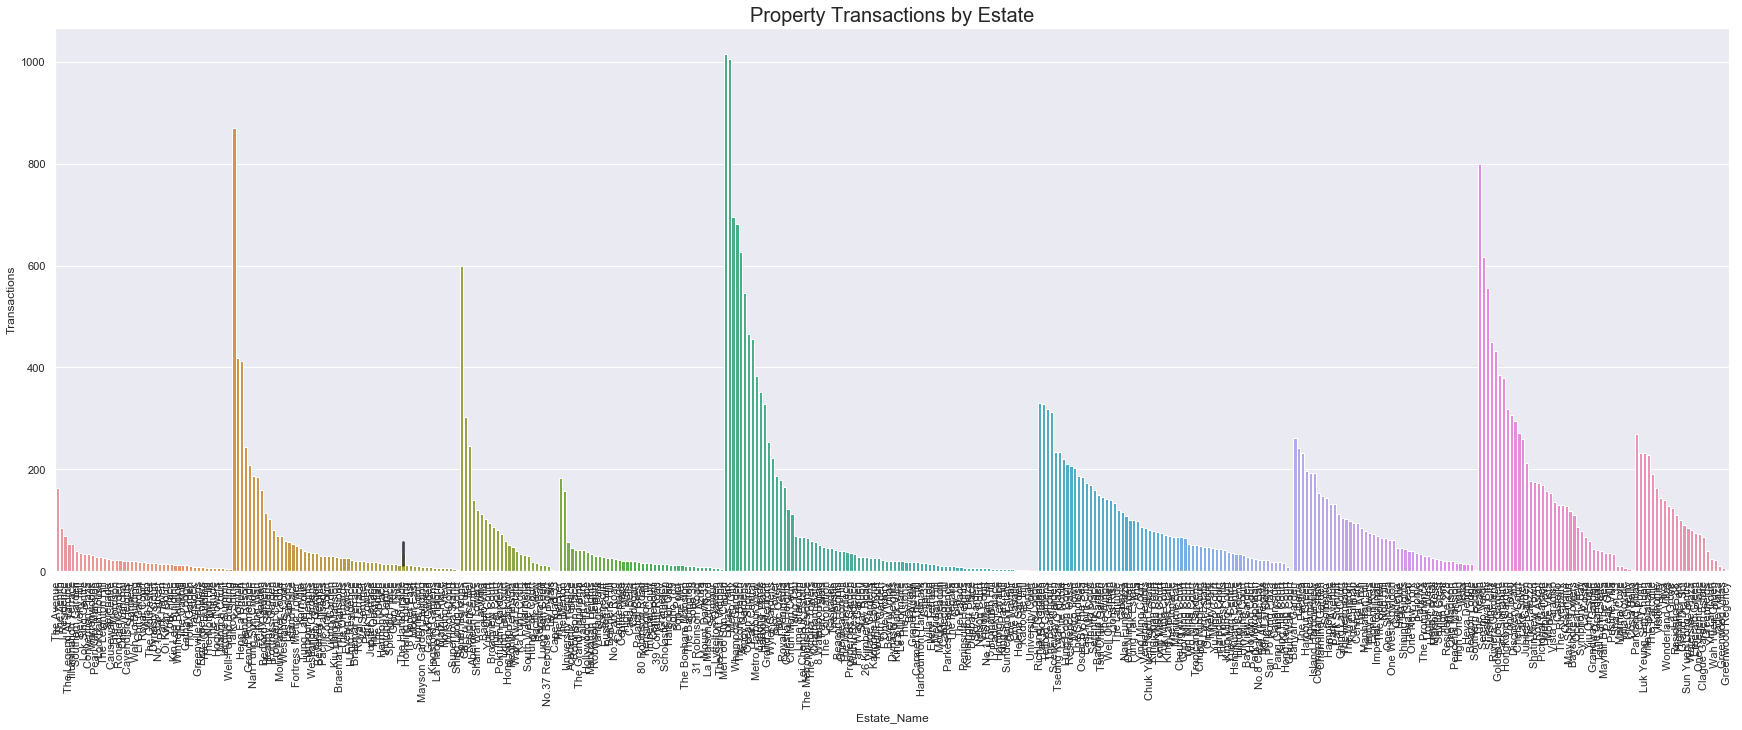

In [9]:
plt.figure(figsize=(30,10))
sns.set()
all_plot = sns.barplot(data = all_table, y = 'Transactions', x = 'Estate_Name')
all_plot.set_title('Property Transactions by Estate', fontsize = 20)
for item in all_plot.get_xticklabels():
    item.set_rotation(90)

In [10]:
# index for the district names
table[table.Transactions.isnull() == True]

,Estate_Name,Transactions
13,Hong Kong Central,NaN
59,Hong Kong East,NaN
118,Hong Kong South,NaN
145,Hong Kong West,NaN
200,More,NaN
201,Kowloon Central,NaN
275,Kowloon East,NaN
351,Kowloon West,NaN
416,N.T. East,NaN
451,N.T. West,NaN


In [11]:
# grouping data by districts
HKC = all_table.loc[14:59]
HKE = all_table.loc[60:118]
HKS = all_table.loc[119:145]
HKW = all_table.loc[146:187]
KC = all_table.loc[188:277]
KE = all_table.loc[278:353]
KW = all_table.loc[354:402]
NTE = all_table.loc[405:453]
NTW = all_table.loc[454:]

Text(0.5, 1.0, 'Property Transactions in Hong Kong Central by Estate')

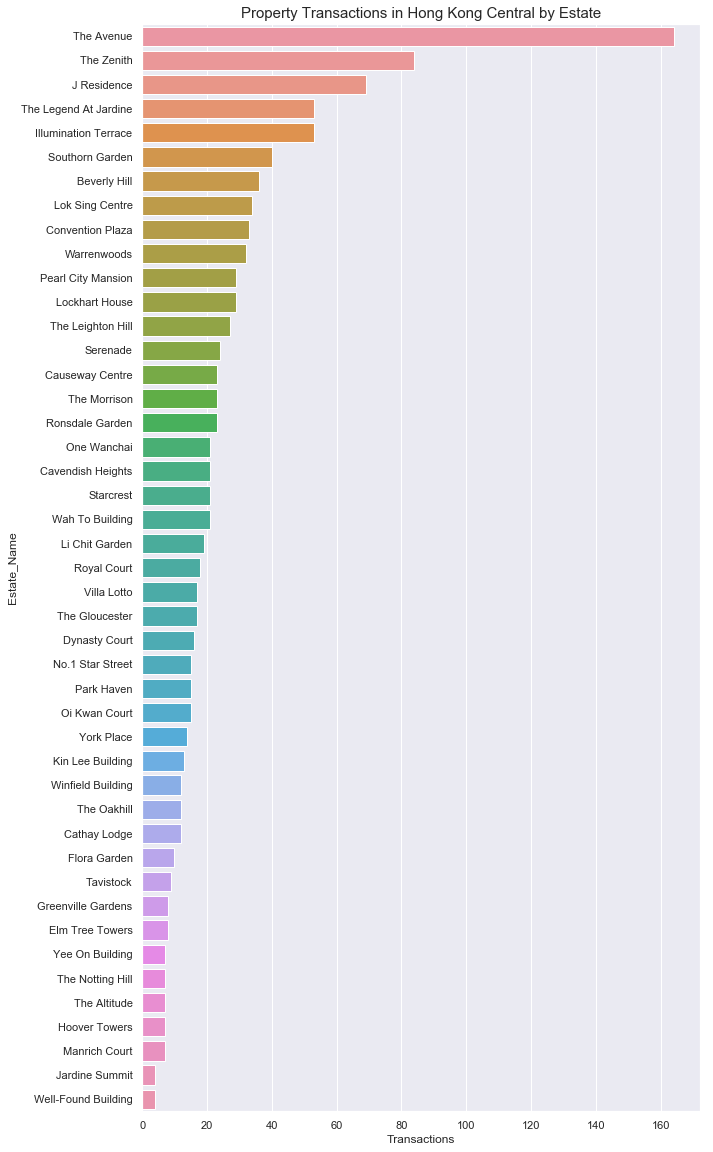

In [12]:
plt.figure(figsize=(10,20))
sns.barplot(data = HKC, x = 'Transactions', y = 'Estate_Name').set_title('Property Transactions in Hong Kong Central by Estate', fontsize = 15)
# the data is already in decending order

In [13]:
district_names = ['Hong Kong Central', 'Hong Kong East', 'Hong Kong South', 'Hong Kong West', 'Kowloon Central', 
                  'Kowloon East', 'Kowloon West', 'N.T. East', 'N.T. West']
district_df = [HKC, HKE, HKS, HKW, KC, KE, KW, NTE, NTW]

<BarContainer object of 24 artists>

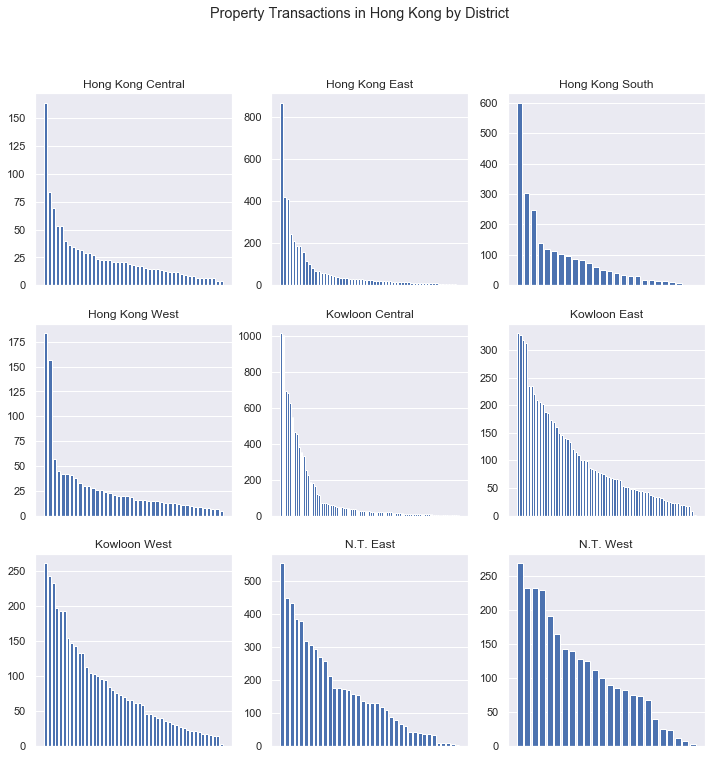

In [14]:
fig = plt.figure(figsize=(12,12))   
ax1 = fig.add_subplot(331)   
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

fig.suptitle('Property Transactions in Hong Kong by District')
ax1.set(title = district_names[0])
ax2.set(title = district_names[1])
ax3.set(title = district_names[2])
ax4.set(title = district_names[3])
ax5.set(title = district_names[4])
ax6.set(title = district_names[5])
ax7.set(title = district_names[6])
ax8.set(title = district_names[7])
ax9.set(title = district_names[8])

# too many estate names which are difficult to read so set x-axis invisible
ax1.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)
ax3.axes.get_xaxis().set_visible(False)
ax4.axes.get_xaxis().set_visible(False)
ax5.axes.get_xaxis().set_visible(False)
ax6.axes.get_xaxis().set_visible(False)
ax7.axes.get_xaxis().set_visible(False)
ax8.axes.get_xaxis().set_visible(False)
ax9.axes.get_xaxis().set_visible(False)

ax1.bar(HKC.Estate_Name, HKC.Transactions)
ax2.bar(HKE.Estate_Name, HKE.Transactions)
ax3.bar(HKS.Estate_Name, HKS.Transactions)
ax4.bar(HKW.Estate_Name, HKW.Transactions)
ax5.bar(KC.Estate_Name, KC.Transactions)
ax6.bar(KE.Estate_Name, KE.Transactions)
ax7.bar(KW.Estate_Name, KW.Transactions)
ax8.bar(NTE.Estate_Name, NTE.Transactions)
ax9.bar(NTW.Estate_Name, NTW.Transactions)

In [15]:
# transactoin data for every districts
df_l = []

for i in district_df:
    df_l.append(i.Transactions.reset_index().Transactions)
    df = pd.concat(df_l, axis=1)
    
df.columns = district_names    
df.head()

,Hong Kong Central,Hong Kong East,Hong Kong South,Hong Kong West,Kowloon Central,Kowloon East,Kowloon West,N.T. East,N.T. West
0,164.0,870.0,600.0,184.0,1016,331.0,261.0,555.0,269.0
1,84.0,419.0,303.0,157.0,1006,328.0,242.0,450.0,232.0
2,69.0,413.0,246.0,57.0,695,318.0,232.0,433.0,232.0
3,53.0,244.0,139.0,45.0,682,312.0,197.0,385.0,229.0
4,53.0,209.0,120.0,42.0,627,235.0,193.0,380.0,191.0


In [16]:
df_total = pd.concat([df, all_table.Transactions], axis=1)
df_total = df_total.rename(columns = {'Transactions':'Total'})
df_total.tail()

,Hong Kong Central,Hong Kong East,Hong Kong South,Hong Kong West,Kowloon Central,Kowloon East,Kowloon West,N.T. East,N.T. West,Total
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0
483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [17]:
df_total.describe()

,Hong Kong Central,Hong Kong East,Hong Kong South,Hong Kong West,Kowloon Central,Kowloon East,Kowloon West,N.T. East,N.T. West,Total
count,45.000000,58.000000,26.000000,42.000000,80.000000,65.000000,48.000000,38.000000,24.000000,428.000000
mean,25.177778,71.051724,89.653846,27.833333,114.862500,101.538462,80.958333,162.657895,110.125000,90.348131
std,26.919315,137.626423,126.893323,34.595867,217.000948,84.579858,66.531694,142.254868,77.884146,139.103041
min,4.000000,3.000000,0.000000,5.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000
25%,12.000000,13.000000,17.250000,12.250000,8.750000,37.000000,29.250000,41.500000,60.250000,16.000000
50%,18.000000,26.000000,49.000000,17.500000,24.000000,71.000000,63.000000,130.500000,95.000000,36.000000
75%,29.000000,56.250000,100.250000,29.500000,68.000000,146.000000,106.250000,247.250000,148.250000,105.250000
max,164.000000,870.000000,600.000000,184.000000,1016.000000,331.000000,261.000000,555.000000,269.000000,1016.000000


Text(0, 0.5, 'Transactions')

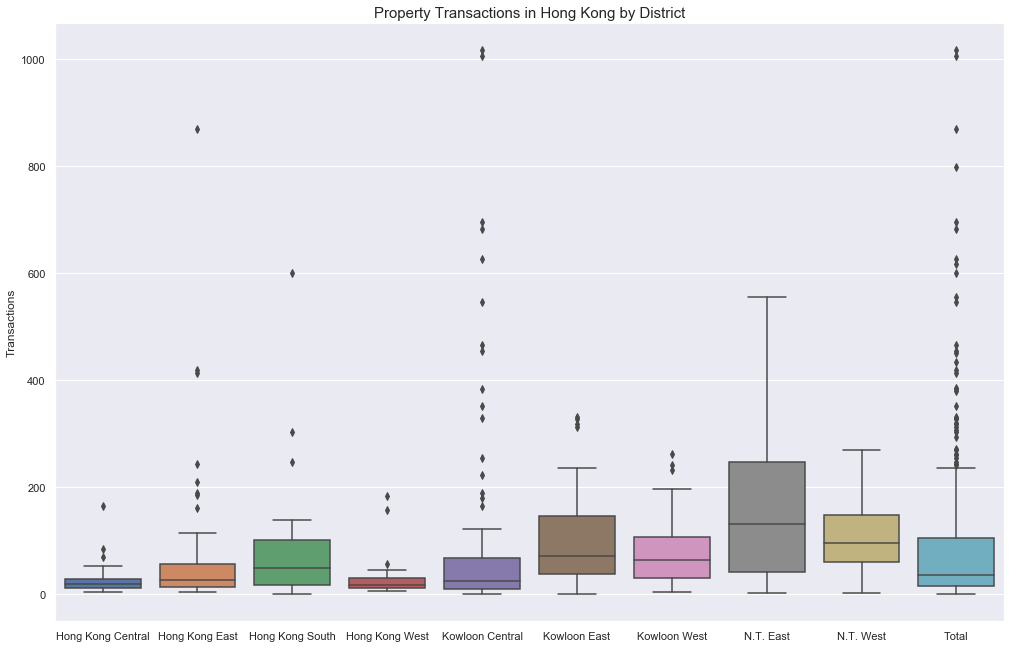

In [18]:
plt.figure(figsize=(17,11))
sns.boxplot(data = df_total).set_title('Property Transactions in Hong Kong by District', fontsize = 15)
plt.ylabel('Transactions')
## total boxplot

In [19]:
df1 = df.stack().reset_index()
df1 = df1.drop(['level_0'], axis=1)
df1.columns = ['District', 'Transactions']
df1.head()

,District,Transactions
0,Hong Kong Central,164.0
1,Hong Kong East,870.0
2,Hong Kong South,600.0
3,Hong Kong West,184.0
4,Kowloon Central,1016.0


Text(0.5, 1.0, 'Total Property Transactions in Hong Kong by District')

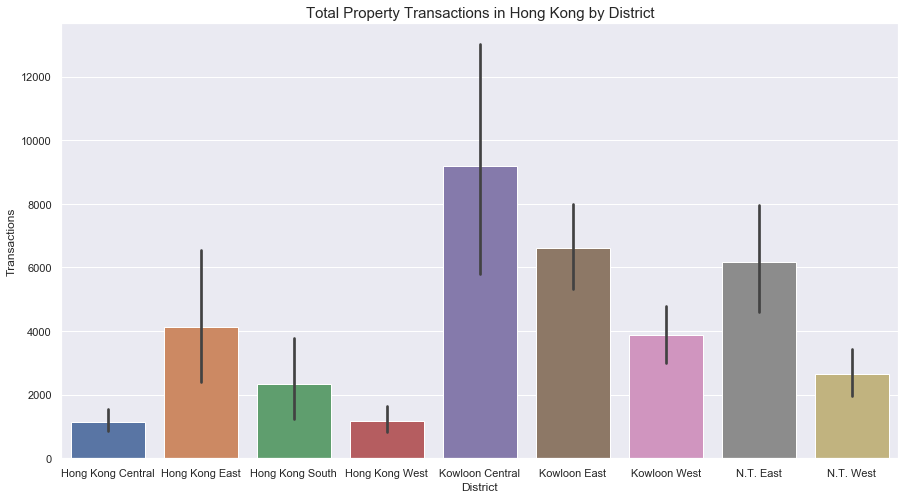

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'District', y = 'Transactions', data = df1, estimator = sum).set_title('Total Property Transactions in Hong Kong by District', fontsize = 15)